In [1]:
import numpy as np
from itertools import combinations_with_replacement as cwr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

def polynomialFeatures(X, degree):
    output = np.array([])
    for i in range(1, degree + 1):
        temp = np.array(list(cwr(X,i)))
        print(temp)
        for j in range(len(temp)):
            output = np.append(output, np.prod(temp[j]))
    return output

In [2]:
def mse(Y_true, Y_pred):
    return np.mean((Y_true-Y_pred)**2)

In [3]:
def cross_validation(X,y,cv,model,learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0):

    #seed=np.random.randint(1,500)
    data=np.asarray(X)
    labels=np.asarray(y)
    #np.random.seed(seed)
    #np.random.shuffle(data)
    #np.random.seed(seed)
    #np.random.shuffle(labels)
    
    datafolds=np.array_split(data,cv)
    labelfolds=np.array_split(labels,cv)
    training_scores=[]
    validation_scores=[]
    for fold in range(len(datafolds)):
        trainingdatafolds=np.vstack([data for k, data in enumerate(datafolds) if k not in [fold]])
        trainingdatafolds=trainingdatafolds.reshape(-1,data.shape[1])
        trainingdata=np.empty((0,data.shape[1]), int)
        trainingdata=np.append(trainingdata, trainingdatafolds, axis=0)
        
        traininglabelfolds=np.concatenate([label for k, label in enumerate(labelfolds) if k not in [fold]])
        traininglabelfolds=traininglabelfolds.reshape(-1,1)
        traininglabels=np.empty((0,1), int)
        traininglabels=np.append(traininglabels, traininglabelfolds, axis=0)
    
        validationdata=datafolds[fold]
        validationlabels=labelfolds[fold]
        
        calledmodel=model()
        calledmodel.fit(trainingdata,traininglabels,learning_rate=learning_rate, epochs=epochs, tol=tol, regularizer=regularizer, lambd=lambd)
        train_preds =calledmodel.predict(trainingdata)
        validation_preds = calledmodel.predict(validationdata)
        training_scores.append(mse(traininglabels,train_preds))
        validation_scores.append(mse(validationlabels,validation_preds))

    return np.mean(training_scores), np.mean(validation_scores)


def learning_curve(model, X, y, cv, train_size=1, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    training_scores=[]
    validation_scores=[]
    if train_size >= 1:
        index=train_size
        while index < len(y):
            X_subset=X[0:index,:]
            y_subset=y[0:index]
            train, val=cross_validation(X_subset,y_subset,cv,model,learning_rate=learning_rate, epochs=epochs, tol=tol, regularizer=regularizer, lambd=lambd)
            training_scores.append(train)
            validation_scores.append(val)
            index += index
    else:
        index=len(X) - int(round(len(X) * train_size))
        while index <= 1:
            X_subset=X[0:index,:]
            y_subset=y[0:index]
            train, val=cross_validation(X_subset,y_subset,cv,model,learning_rate=learning_rate, epochs=epochs, tol=tol, regularizer=regularizer, lambd=lambd)
            training_scores.append(train**0.5)
            validation_scores.append(val**0.5)
            index += index
    
    return training_scores, validation_scores

In [4]:
def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epochs=1000, tol=None, regularized=None, lambd=0.0, **kwargs):
    mse_train, mse_test = [], []
    degree_list = list(range(1, maxPolynomialDegree + 1))
    for degree in enumerate(degree_list, 1):
        X = polynomialFeatures(X, degree)
        train_score, val_score = learning_curve(model, X, Y, cv, 1, learning_rate, epochs, tol, regularizer, lambd, **kwargs)
        mse_train.append(train_score)
        mse_test.append(val_score)
    plt.figure(figsize=(10,6))
    plt.plot(degreeList, val_scores, "ro-", alpha=1.0, linewidth=1.0, label="Test RMSE")
    plt.plot(degreeList, train_scores, "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.title("RMSE for Varying Degree")
    plt.show()

In [5]:
class Linear_Regression:
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=0.0001, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
        bias_term=np.ones((X.shape[0], 1))
        X=np.hstack((bias_term,X)))
        theta=np.ones((X.shape[1], 1))

        for i in range(epochs):
            y_hat=np.asarray(X*theta)
            error=mse(Y,y_hat)
            if regularizer==None:
                #theta=theta-((learning_rate/X.shape[0])*np.dot(X.T,(y_hat-Y)))
                #print(y_hat-Y)
                theta=theta-((learning_rate/X.shape[0])*X.T*(y_hat-Y))
            elif regularizer=='l1':
                theta=theta-(learning_rate/X.shape[0]*np.dot(X.T,(y_hat-Y)))-(learning_rate*lambd/X.shape[0])*np.sign(theta)
            else:
                theta=theta-(learning_rate/X.shape[0]*np.dot(X.T,(y_hat-Y)))-learning_rate*lambd*theta/X.shape[0]
            new_y_hat=np.asarray(X*theta)
            new_error=mse(Y,new_y_hat)
            #print(new_error)
            if tol is not None:
                if new_error > error-tol:
                    break
        self.theta=theta
        
    
    def predict(self, X):
        bias_term=np.ones((X.shape[0], 1))
        X=np.hstack((bias_term,X))
        return np.asarray(X*self.theta)

In [6]:
df = pd.read_csv('./datasets/winequality-red.csv', sep=';')

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
dff = df.sample(frac=1)
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1154,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,11.40,6
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7
693,9.0,0.480,0.32,2.8,0.084,21.0,122.0,0.99840,3.32,0.62,9.40,5
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.00,6
1289,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.20,5
1527,7.1,0.530,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.80,6
1022,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.50,5
283,8.9,0.400,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.50,7
773,7.9,0.400,0.29,1.8,0.157,1.0,44.0,0.99730,3.30,0.92,9.50,6
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.40,4


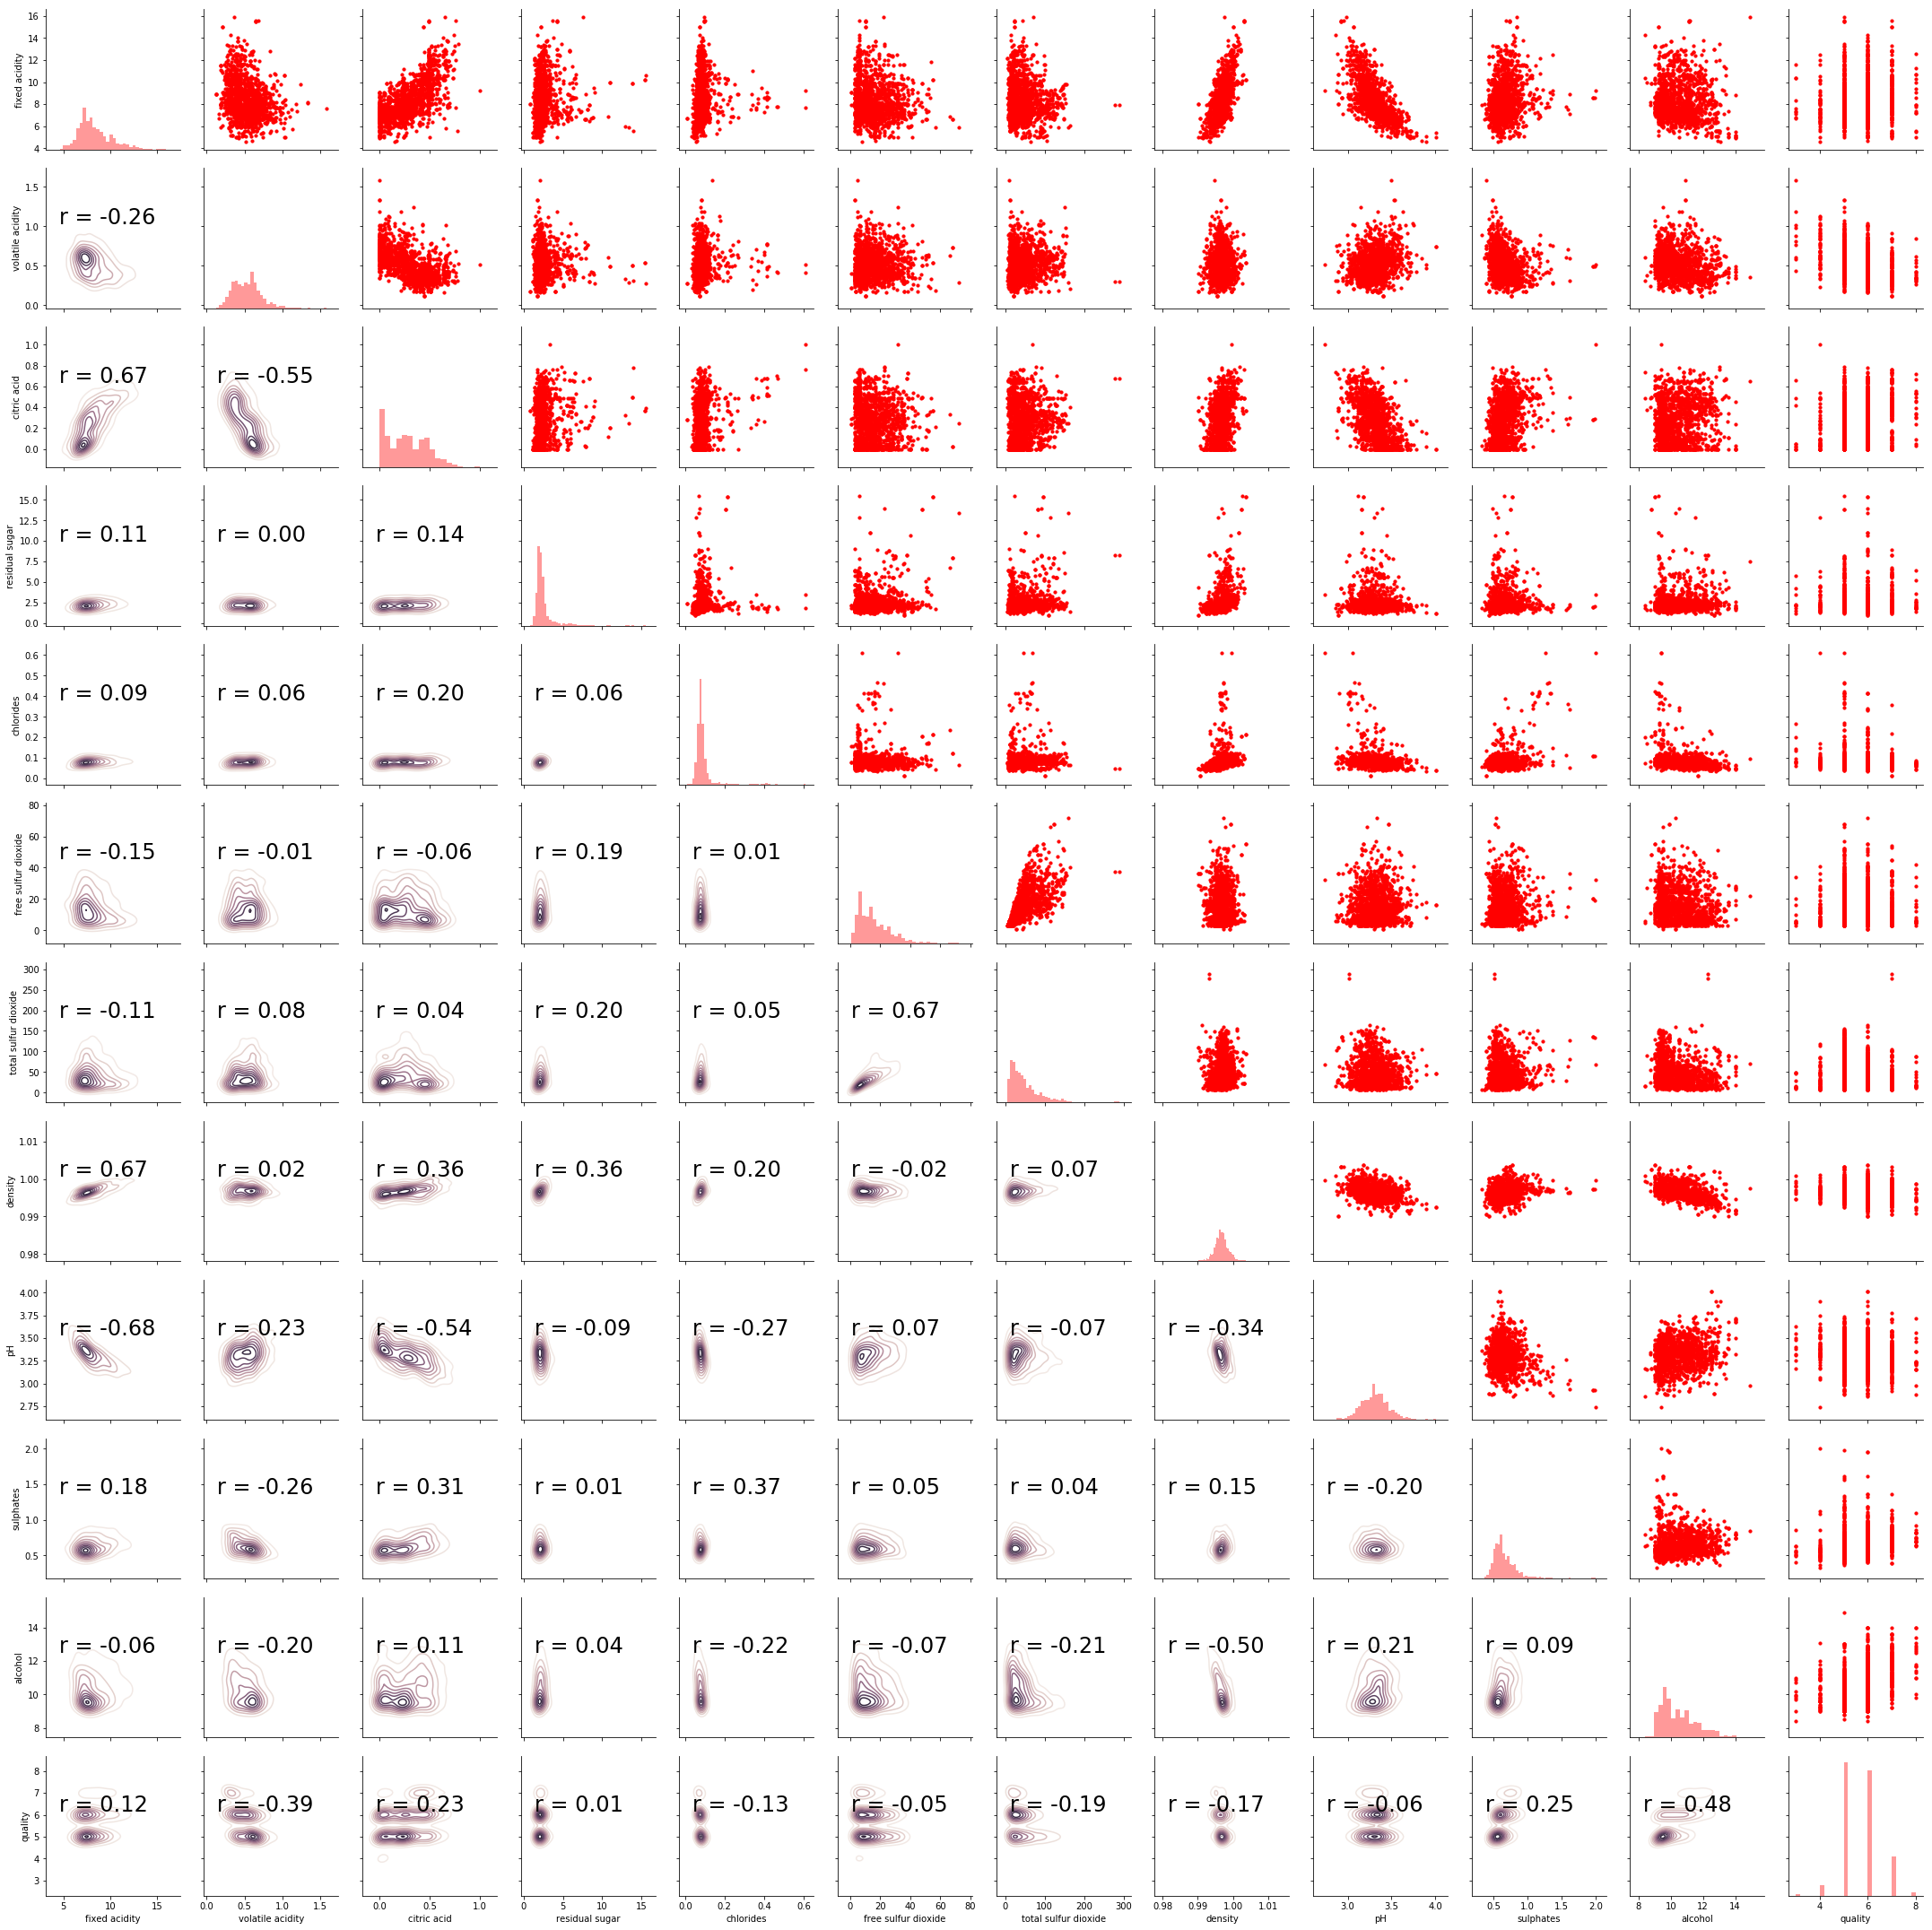

In [8]:
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(dff)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [7]:
def partition(feature_matrix, target_vector, t):
    last_index_taken = len(feature_matrix) - int(round(len(feature_matrix) * t))
    X_train = feature_matrix[0:last_index_taken,:]
    X_test = feature_matrix[last_index_taken:len(feature_matrix), :]
    y_train = target_vector[0:last_index_taken]
    y_test = target_vector[last_index_taken:len(target_vector)]
    return X_train, X_test, y_train, y_test

In [8]:
def kfold(folds, data, labels, model, model_args, score_function,seed=None):
    if (seed == None):
        seed = np.random.randint(1,500)
    data = np.asarray(data)
    #print(data.shape)
    labels = np.asarray(labels)
    #print(labels.shape)
    np.random.seed(seed)
    np.random.shuffle(data)
    np.random.seed(seed)
    np.random.shuffle(labels)
    
    datafolds = np.array_split(data,folds)
    labelfolds = np.array_split(labels,folds)
    
    scores = []
    true_labels = np.array([])
    predictions = np.array([])

    for fold in range(len(datafolds)):
        trainingdatafolds = np.vstack([data for k, data in enumerate(datafolds) if k not in [fold]])
        trainingdatafolds = trainingdatafolds.reshape(-1,data.shape[1])
        trainingdata = np.empty((0,data.shape[1]), int)
        trainingdata = np.asmatrix(np.append(trainingdata, trainingdatafolds, axis=0))
        
        traininglabelfolds = np.concatenate([label for k, label in enumerate(labelfolds) if k not in [fold]])
        traininglabelfolds = traininglabelfolds.reshape(-1,1)
        traininglabels = np.empty((0,1), int)
        traininglabels = np.append(traininglabels, traininglabelfolds, axis=0)
    
        testingdata = np.asmatrix(datafolds[fold])
        testinglabels = labelfolds[fold]
        
        calledmodel = model()
        calledmodel.fit(X=trainingdata, Y=traininglabels, kwargs=model_args)
        preds = calledmodel.predict(testingdata)
        score = score_function(preds,testinglabels)
        scores = np.append(scores,score)
        true_labels = np.append(labels,testinglabels)
        predictions = np.append(predictions,preds)
    
    
    results={'avgerage_score':np.mean(scores),'predicted_values':predictions, 'true_values':true_labels}

    return results

In [73]:
def min_max_scale(X):
    mins=np.amin(X,axis=0)
    maxs=np.amax(X,axis=0)
    scaleX=np.zeros((X.shape[0],X.shape[1]))
    scaleX=(X-mins)/(maxs-mins)
    return np.asmatrix(scaleX)
            
    

In [75]:
features=np.asarray(df.loc[:, df.columns != 'quality'])
labels=np.asarray(df.loc[:, df.columns == 'quality'])

scaled_features=min_max_scale(features)
X_train, X_test, y_train, y_test =partition(features, labels, 0.2)

In [77]:
lambd_values= [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate_values = [1.0, 0.1, 0.01, 0.001, 0.0001]
regularizer_values= ['l1', 'l2']

for lambd in range(len(lambd_values)):
    for learning_rate in range(len(learning_rate_values)):
        for regularizer in range(len(regularizer_values)):
            hyperparameter_values={'lambd_values':lambd_values[lambd],'learning_rate':learning_rate_values[learning_rate],'regularizer':regularizer_values[regularizer]}
            results=kfold(5,X_train, y_train, Linear_Regression, hyperparameter_values,mse)
            print(hyperparameter_values)
            print(results['avgerage_score'])

{'lambd_values': 1.0, 'learning_rate': 1.0, 'regularizer': 'l1'}
1.3919719952254077
{'lambd_values': 1.0, 'learning_rate': 1.0, 'regularizer': 'l2'}
1.3834931724631692
{'lambd_values': 1.0, 'learning_rate': 0.1, 'regularizer': 'l1'}
1.402995793619768
{'lambd_values': 1.0, 'learning_rate': 0.1, 'regularizer': 'l2'}
1.3960297424827464
{'lambd_values': 1.0, 'learning_rate': 0.01, 'regularizer': 'l1'}
1.3849860705000328
{'lambd_values': 1.0, 'learning_rate': 0.01, 'regularizer': 'l2'}
1.39376190107946
{'lambd_values': 1.0, 'learning_rate': 0.001, 'regularizer': 'l1'}
1.3917922068358357
{'lambd_values': 1.0, 'learning_rate': 0.001, 'regularizer': 'l2'}
1.3902041197506574
{'lambd_values': 1.0, 'learning_rate': 0.0001, 'regularizer': 'l1'}
1.3947380448018594
{'lambd_values': 1.0, 'learning_rate': 0.0001, 'regularizer': 'l2'}
1.3962686827848187
{'lambd_values': 0, 'learning_rate': 1.0, 'regularizer': 'l1'}
1.4039654616883939
{'lambd_values': 0, 'learning_rate': 1.0, 'regularizer': 'l2'}
1.3991